# <font color='blue'>MAI5002 - Fundamentos de Matemática Aplicada</font>

## <font color='blue'>Espaços Vetoriais - Solução dos Exercícios </font>

### Material produzido por Luis Gustavo Nonato 

ICMC-USP

----

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercício 1)
O código abaixo gera uma matriz $\mathbf{X}$ cujas colunas são vetores em um espaço de dimensão 7. Construa uma matriz $\mathbf{P}$ com 100 colunas onde cada coluna corresponde a um ponto no subespaço coluna de $\mathbf{X}$.

```python
X = np.random.uniform(0,1,size=(7,3))
```

In [30]:
X = np.random.uniform(0,1,size=(7,3))

# Para gera pontos no espaço coluna de X basta fazer uma cobinação linear das colunas de X.
# Como temos 3 colunas, precisamos gerar 3 coefincientes c[0], c[1], c[2] e 
# calcular a combinação linear p = c[0]*X[:,0]+c[1]*X[:,1]+c[2]*X[:,2].
# A combinação linear tambem pode ser obtida pela multiplicação matriz vetor de X e c

# Gerando os coeficientes de forma randomica
# Vamos gerar os coeficientes dos 100 pontos de uma unica vez a fim
# de evitar o uso de laço "for". Cada coluna da matriz c corresponde
# aos coeficientes de um ponto em R^7

c = np.random.uniform(0,1,size=(3,100))
P = np.dot(X,c)

# imprimindo as 10 primeiras colunas de P
np.set_printoptions(precision=2) # isto é para mostrar apenas 2 casas decimais
print(P[:,:10])

[[1.01 1.57 1.4  0.8  1.37 0.94 1.12 1.   0.71 1.33]
 [0.88 1.35 1.25 0.69 1.14 1.08 0.86 1.08 0.55 1.11]
 [0.89 0.96 0.87 0.31 1.01 0.74 0.6  0.52 0.35 0.87]
 [0.55 1.17 1.15 0.76 0.79 1.2  0.68 1.34 0.45 0.88]
 [0.27 1.24 1.18 1.01 0.65 1.01 0.84 1.46 0.59 0.87]
 [0.89 1.27 1.21 0.61 1.09 1.21 0.74 1.11 0.46 1.04]
 [0.82 1.51 1.36 0.87 1.19 0.98 1.06 1.15 0.69 1.23]]


### Exercício 2)
O produto escalar entre dois vetores $\mathbf{u}_1$ e $\mathbf{u}_2$ pode ser utilizado para calcular o ângulo entre tais vetores atravéz da fórmula:

$$
\cos(\theta)=\frac{<\mathbf{u}_1,\mathbf{u}_2>}{\|\mathbf{u}_1\|\,\|\mathbf{u}_2\|}
\quad\Longrightarrow\quad
\theta = \arccos\left(\frac{<\mathbf{u}_1,\mathbf{u}_2>}{\|\mathbf{u}_1\|\,\|\mathbf{u}_2\|}\right)
$$

Utilize o resultado acima para encontrar o menor ângulo entre as retas $y+x=1$ e $2y-x=1$.

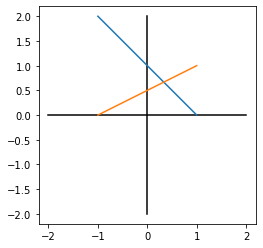

In [17]:

# plotando os eixos do plano
plt.axes().set_aspect('equal')
plt.plot([-2,2],[0,0],color='k')
plt.plot([0,0],[-2,2],color='k')

# desenhando as retas utilizando 2 pontos que pertencem as retas

# pontos sobre a reta x+y=1
r1p1 = np.array([1,0])
r1p2 =  np.array([-1,2])

# pontos sobre a reta 2y-x=1
r2p1 =  np.array([1,1])
r2p2 =  np.array([-1,0])

# plotando as retas
plt.plot([r1p1[0],r1p2[0]],[r1p1[1],r1p2[1]])
plt.plot([r2p1[0],r2p2[0]],[r2p1[1],r2p2[1]])

O ângulo entre as retas é 71.56505117707799 graus


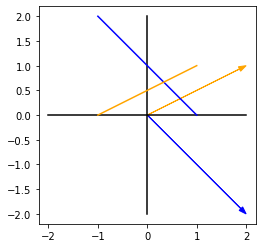

In [25]:
# Solução

# Para encontrar o menor ângulo basta encontrarmos dois vetores paralelos as retas
# e calcular o ângulo entre eles. Tais vetores podem ser obtidos a partir dos
# pontos que estão sobre as retas, calculando a diferença entre eles.

# vetor paralelo a reta x+y=1
vpr1 = r1p1 - r1p2

# vetor paralelo a reta 2y-x=1
vpr2 = r2p1 - r2p2

# calculando o menor ângulo
cosang = np.dot(vpr1,vpr2)/(np.linalg.norm(vpr1)*np.linalg.norm(vpr2))
ang_radianos = np.arccos(cosang) # o angulo é o arco-cosseno do valor calculado
ang_graus = ang_radianos*180/np.pi
print('O ângulo entre as retas é', ang_graus,'graus')

# plotando os eixos do plano
plt.axes().set_aspect('equal')
plt.plot([-2,2],[0,0],color='k')
plt.plot([0,0],[-2,2],color='k')

# plotando as retas
plt.plot([r1p1[0],r1p2[0]],[r1p1[1],r1p2[1]],color='blue')
plt.plot([r2p1[0],r2p2[0]],[r2p1[1],r2p2[1]],color='orange')

# plotando os vetores
plt.arrow(0,0,vpr1[0],vpr1[1],head_width=0.1,length_includes_head=True,color='blue')
plt.arrow(0,0,vpr2[0],vpr2[1],head_width=0.1,length_includes_head=True,color='orange')

### Exercício 3) 
Considere o subespaço $\mathcal{S}$ gerado pelos vetores 
$$
\mathbf{u_1} = \left[\begin{array}{c}
                3 \\ 4 \\ 4 \\ 6 \\ 1
                \end{array}\right] \qquad               
\mathbf{u_2} = \left[\begin{array}{c}
                7 \\ 1 \\ 0 \\ 2 \\ 1
                \end{array}\right]
$$

Construa uma transformação linear $\mathbf{A}$ tal que $\mathbf{A}:\mathbb{R}^2\rightarrow\mathcal{S}\subset\mathbb{R}^5$, ou seja, a transformação $\mathbf{A}$ leva vetores do espaço $\mathbb{R}^2$ para o espaço $\mathcal{S}$.

In [9]:
#Solução

# A matriz cujas colunas são dadas pelos vetores u1 e u2 irá mapear o 
# o espaço R^2 no subespaço gerado por tais vetores em R^5

A = np.array([[3, 4, 4, 6, 1],[7, 1, 0, 2, 1]]).T
print(A)

# gerando pontos em R^2
x = np.random.uniform(0,10,size=(2,1))

print('A imagem do ponto\n',x)
print('em R^5 é\n',np.dot(A,x))

[[3 7]
 [4 1]
 [4 0]
 [6 2]
 [1 1]]
A imagem do ponto
 [[6.1479748 ]
 [8.70851885]]
em R^5 é
 [[79.40355634]
 [33.30041804]
 [24.59189919]
 [54.30488648]
 [14.85649365]]


### Exercício 4) 
Considere a transformação linear dada pela matriz 

$$
\left(\begin{array}{ccccccc}
3 & 8 & 4 & 4 & 6 & 0 & 6 & 0 & 6\\
3 & 4 & 5 & 2 & 6 & 0 & 0 & 5 & 6\\
2 & 2 & 1 & 1 & 4 & 4 & 3 & 0 & 3\\
0 & 6 & 8 & 3 & 0 & 0 & 3 & 4 & 6
\end{array}\right)
$$

Qual a dimensão do núcleo da transformação?

In [5]:
A = np.asarray([[3, 8, 4, 4, 6, 0, 6, 0, 6],
                [3, 4, 5, 2, 6, 0, 0, 5, 6],
                [2, 2, 1, 1, 4, 4, 3, 0, 3],
                [0, 6, 8, 3, 0, 0, 3, 4, 6]])

In [6]:
#Solução

# dim(nucleo) + dim(imagem) = 9
# dim(imagem) = numero de colunas LI
# como o número de colunas LI é igual ao número de linhas LI, temos
# que no máximo 4 colunas serão LI. 
# Como as 4 colunas da matriz A4 abaixo são LI, então dim(nucleo) = 9 - 4 = 5

A4 = np.asarray([[3, 8, 4, 0],
                 [3, 4, 5, 0],
                 [2, 2, 1, 4],
                 [0, 6, 8, 0]])

# para vefificar que de fato tais colunas são LI, basta calcularmos o determinante da matriz
# e verificar que é diferente de zero
print(np.linalg.det(A4))

print("A dimensão do núcleo é 9 - 4 = 5")

455.9999999999998
A dimensão do núcleo é 9 - 4 = 5


### Exercício 5)
Considere o conjunto de pontos X no espaço $\mathbb{R}^3$ gerados no código abaixo.
Tais pontos formam um espiral em $\mathbb{R}^3$ como ilustrado.
Construa duas transformações lineares que mapeiam pontos de $\mathbb{R}^3$ para $\mathbb{R}^2$, sendo uma com espaço linha dado pelos vetores [1,1,1] e [-1,0,1]
e outra com espaço linha gerado pelos vetores [1,1,1] e [1,1.3,1].

Visualize as espirais mapeadas em  $\mathbb{R}^2$. Você consegue explicar o que está acontecendo?

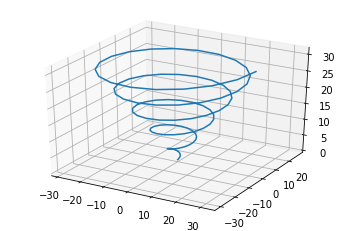

In [8]:
from mpl_toolkits.mplot3d import Axes3D

X = np.zeros((3,100))
t = np.linspace(0,10*np.pi,100)

X[0,:] = t*np.cos(t)
X[1,:] = t*np.sin(t)
X[2,:] = t

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
plt.plot(X[0],X[1],X[2])


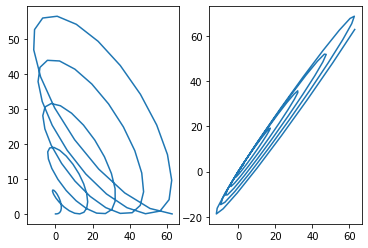

In [24]:
A1 = np.array([[1,1,1],[-1,0,1]])
A2 = np.array([[1,1,1],[1,1.3,1]])

y1 = np.dot(A1,X)
y2 = np.dot(A2,X)

plt.subplot(121)
plt.plot(y1[0],y1[1])

plt.subplot(122)
plt.plot(y2[0],y2[1])